### SSD (Single Shot MultiBox Detector)
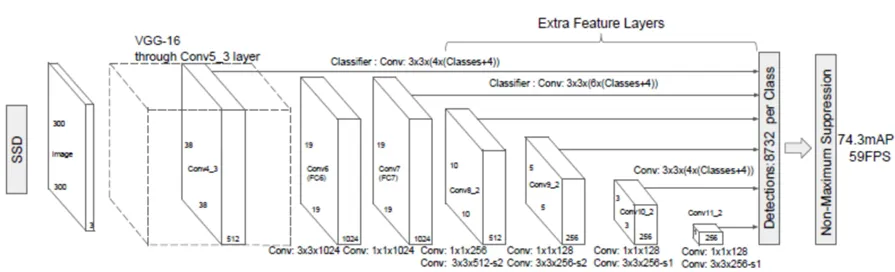

### 특징
- 객체 인식을 위한 모델
- YOLO 와 같은 One-stage detectors
- 빠른 처리 및 실시간
- 지도 학습
    - 높은 Mean Average Precision 값
        - FPS : 58
        - MAP: 72.1
    
>cf) YOLO
>   - FPS : 45
    >- MAP: 63.4
        


- Single Shot Detection 이다
    - 객체의 위치와 분류를 동시에 진행
- Multi Box
    - 다양한 피쳐 맵을 이용하여 Default Box(=Anchor Box) 를 정의하고
    - 이 박스 들을 조정해 여러 크기의 객체를 효과적으로 탐지
- Multi-scale-approach
    - 입력 이미지로 부터 다양한 규모의 피쳐 맵을 사용하여 각 레벨에서의 객체 탐지
    - 각 피쳐 맵은 서로 크기가 다르다 
    - 작은 피쳐 맵 → 큰 크기의 객체
    - 큰 피쳐 맵 → 작은 크기의 객체
    
- 속도와 정확도
    - 고속 처리 + 높은 정확도로 자율 주행 자동차에 이용
    
- Non-Maximum Suppression
    - IoU 이용 가장 확률이 높은 박스를 선택, 겹치는 상자 제거

### boxes
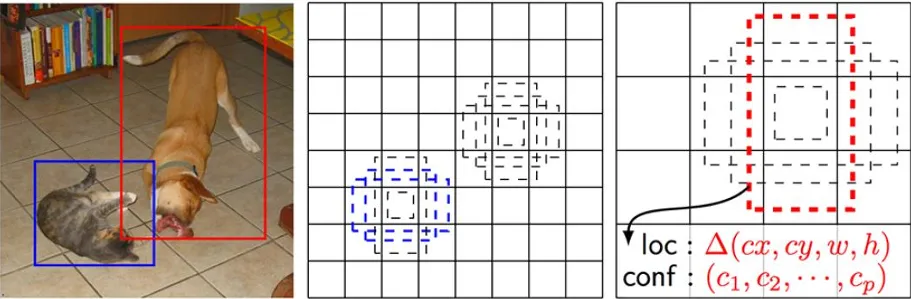
- Bounding Box : 객체 주변의 경계 상자
- Ground Truth Bounding Box : 정답 경계 상자
- Default Box : 사전 정의 참조 박스, 이를 기준으로 크기를 예측한다.

### 학습 프로세스 순서
1. Multi-Scale Feature map 생성
    - 사용 피쳐 맵 : VGG-16 $\times 1$ → CNN $\times 5$
        
        다양한 크기의 feature map 추출 → 여러 크기의 물체 탐지
        
2. 각 Cell 기본 박스에 할당(anchor)
    - IoU 기준 이상인 박스를 Positive 샘플로 선택
        - 추후 HNM 으로 비율을 맞춘다.
    - Cell : feature map 의 위치를 가르 킨다.
        - Cell 개수 : 피쳐 맵의 해상도
    - Anchor Box : 기준 상자, 이를 기준으로 다양한 형체의 객체를 탐색한다
        
        Anchor Box 의 크기 = $w_i, h_i = (s_j \sqrt{a_i}, s_j \frac{1}{\sqrt{a_i}})$
        
        CF)  ROI(Region Of Interest) R-CNN 계열의 모델에 사용
        
    
    **기본 박스 생성 및 배치 시에 VGG16 과 같은 사전 학습 모델을 이용한다 (원본X)**
    
3. 손실 계산
    - $y - \hat{y}$ = offset = 좌표 - 좌표
        - 정답 **Bounding box(=Ground Truth BB)** - 예측 **Bounding box**
        
4. Hard Negative Mining<br>
    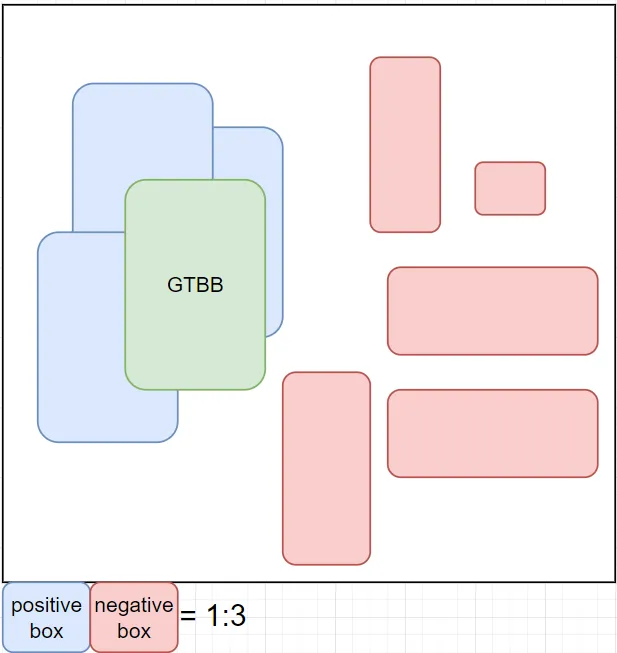<br>
    - 기본적으로 GTBB 상자와 겹치는 상자보다 겹치지 않은 상자가 많으므로,
    - 정답 라벨 보다 아닌 라벨의 더많아 불균형이 된다.
    - 이때 Positive Box 와 Negative Box 의 비율을 1:3 정보의 비율로 조정한다(**HNM**)
5. 예측 (Non-Max Suppression)
    1. GTBB 와 예측한 anchor box 와 의 offset 을 예측 (회귀)
        1. 시작과 끝 위치 차이의 방법
            
            GTBB 의 시작 X, Y - Predicted BB 의 시작 X, Y
            
            GTBB 의 끝 X, Y - Predicted BB 의 끝 X, Y
            위 둘 사이의 차이를 학습
            
        2. 중심 점 끼리 와의 차이 학습
        3. 가로 세로 크기 차이 와의 학습
        4. IoU 학습
    2. 이 박스가 어떤 클래스의 확률이 높은지 예측 (분류 : $softmax$)
6. 총 예측 결과
    - 각 피쳐맵에 투영한 필터에 대한 결과 출력 SSD 의 경우 총 6개의 필터
        
        작은 피쳐 맵⇒ 수용 영역이 크다 ⇒ 큰 객체 탐색
        
        큰 피쳐 맵⇒ 수용 영역이 작다 ⇒ 작은 객체 탐색
        
        - 각 층의 출력
            
            $\text{layer name} =w_{filter} \times h_{filter}   \times (n_{\text{anchor box}} \times (n_{\text{softmax result}} + 4_{\text{axis}})$
            
            ```python
            conv4_3  = 38 * 38 * (4 * (Classes + 4))  # 5776  * (Classes + 4)
            conv7    = 19 * 19 * (6 * (Classes + 4))  # 2166  * (Classes + 4)
            conv8_2  = 10 * 10 * (6 * (Classes + 4))  # 600   * (Classes + 4)
            conv9_2  =  5 *  5 * (6 * (Classes + 4))  # 150   * (Classes + 4)
            conv10_2 =  3 *  3 * (4 * (Classes + 4))  # 36    * (Classes + 4)
            conv11_2 =  1 *  1 * (4 * (Classes + 4))  # 4     * (Classes + 4)
            ```

### 용어정리
- SSD (Single Shot Detection) : 한번에 위치와 분류를 수행 한다.
- GTBB (Ground Truth Bounding Box : 정답 경계 상자)
- DB (Default Box = Anchor Box : 기본 상자 - 각 셀에 배정 받는 다양한 크기의 상자)
- HNM (Hard Negative Mining) : 양성, 음성 박스 비율 맞추기
- IoU (Intersection of Union) : 전체 중에 겹치는 비율
- mAP (mean Average Precision) : 평균 정밀도


### mAP (Mean Average Precision)


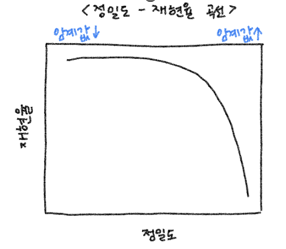

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import numpy as np

In [ ]:
# 주어진 재현율과 정밀도 값을 기반으로 AP를 계산.
#    - recalls (np.array): 재현율 값 배열
#    - precisions (np.array): 정밀도 값 배열
#    Returns: float: 계산된 AP 값

def calculate_ap(recalls, precisions):
    # 정밀도와 재현율의 곡선 아래 면적을 계산 (AUC)
    return auc(np.array(recalls), np.array(precisions))

# 각 클래스에 대한 AP를 계산, 평균(mAP) 계산
#   - y_true (np.array): 실제 레이블 배열 (one-hot 인코딩 형식)
#   - y_scores (np.array): 예측 점수 배열 (모델 출력 점수)
#   - num_classes (int): 클래스의 총 개수

#    Returns:
#    - float: 계산된 mAP 값

def mean_average_precision(y_true, y_scores, num_classes):

    ap_list = []
    for class_id in range(num_classes):
        # 각 클래스별로 실제 값과 예측 점수를 추출
        class_true = y_true[:, class_id]
        class_scores = y_scores[:, class_id]

        # 정밀도와 재현율 계산
        precision, recall, _ = precision_recall_curve(class_true, class_scores)
        precision = np.flip(precision)
        recall = np.flip(recall)

        # AP 계산
        ap = calculate_ap(recall, precision)
        ap_list.append(ap)

    # 모든 클래스의 AP를 평균내어 mAP 계산
    return np.mean(ap_list)



In [ ]:
# 예제 데이터
y_true = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])  # 실제 레이블 (one-hot)
y_scores = np.array([[0.9, 0.1, 0.8], [0.1, 0.9, 0.1], [0.8, 0.2, 0.7]])  # 예측 점수
num_classes = 3  # 클래스 수



In [ ]:
# mAP 계산
map_score = mean_average_precision(y_true, y_scores, num_classes)
print(f"Mean Average Precision (mAP): {map_score}")

Mean Average Precision (mAP): 1.0


### None Max Suppression

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [15]:
# 이미지 로드
image_path = 'data/_test_14.png'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# cv2.imread로 이미지를 로드, cv2.cvtColor로 RGB 형식으로 변환


In [44]:
# 임의의 바운딩 박스와 신뢰도 점수 생성 (ex)
boxes = np.array([                         # 네 개의 바운딩 박스
    [50, 50, 200, 200],
    [60, 60, 210, 210],
    [200, 200, 400, 400],
    [220, 220, 420, 420]
])

scores = np.array([0.9, 0.85, 0.75, 0.7]) # 각 바운딩 박스의 신뢰도 점수


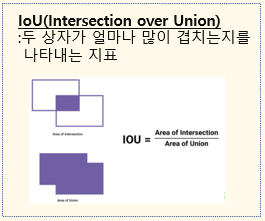

In [45]:
# IoU 계산 함수
def compute_iou(box, boxes):
    x1 = np.maximum(box[0], boxes[:, 0])
    y1 = np.maximum(box[1], boxes[:, 1])
    x2 = np.minimum(box[2], boxes[:, 2])
    y2 = np.minimum(box[3], boxes[:, 3])

    intersection = np.maximum(0, x2 - x1 + 1) * np.maximum(0, y2 - y1 + 1)
    box_area = (box[2] - box[0] + 1) * (box[3] - box[1] + 1)
    boxes_area = (boxes[:, 2] - boxes[:, 0] + 1) * (boxes[:, 3] - boxes[:, 1] + 1)

    iou = intersection / (box_area + boxes_area - intersection)
    return iou

# IoU(Intersection over Union) 두 바운딩 박스의 겹치는 비율
# x1, y1, x2, y2는 각 박스의 겹치는 영역의 좌표 계산
# intersection : 겹치는 영역의 면적 계산
# box_area : 현재 박스의 면적
# boxes_area : 다른 박스들의 면적

# iou : 겹치는 영역의 면적을 두 박스의 합집합 면적으로 나눔



In [46]:
a = compute_iou(boxes[0], boxes[1:])
print(a)

[7.72948175e-01 1.58225345e-05 0.00000000e+00]


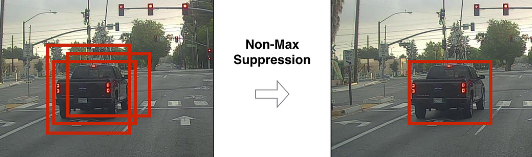

In [47]:
# NMS 적용 함수
def non_max_suppression(boxes, scores, iou_threshold):
    sorted_indices = np.argsort(scores)[::-1]
    keep_boxes = []

    while len(sorted_indices) > 0:
        current_index = sorted_indices[0]
        keep_boxes.append(current_index)

        remaining_indices = sorted_indices[1:]
        overlaps = compute_iou(boxes[current_index], boxes[remaining_indices])
        # print(overlaps)

        sorted_indices = remaining_indices[overlaps <= iou_threshold]

    return keep_boxes

# Non-Maximum Suppression(NMS)
   # 겹치는 바운딩 박스를 제거하고 가장 신뢰도가 높은 박스 선택

# sorted_indices : 신뢰도 점수에 따라 박스를 내림차순으로 정렬
# keep_boxes : 최종 선택된 박스의 인덱스 저장
# while ... 과정 반복
# compute_iou 함수 call ->  IoU 계산 -> iou_threshold 이하인 박스들만 남김

In [48]:
# NMS 적용
iou_threshold =0.25  # iou_threshold를 설정
selected_indices = non_max_suppression(boxes, scores, iou_threshold)
   # NMS를 적용하여 선택된 박스의 인덱스를 얻습니다
selected_boxes = boxes[selected_indices]
   # NMS 후 선택된 바운딩 박스가 저장


In [49]:
selected_indices

[0, 2]

In [50]:
# 원본 이미지에 바운딩 박스 그리기
for box in boxes:
    cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 2)  # 원본 박스 (파란색)

for box in selected_boxes:
    cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)  # NMS 후 박스 (초록색)

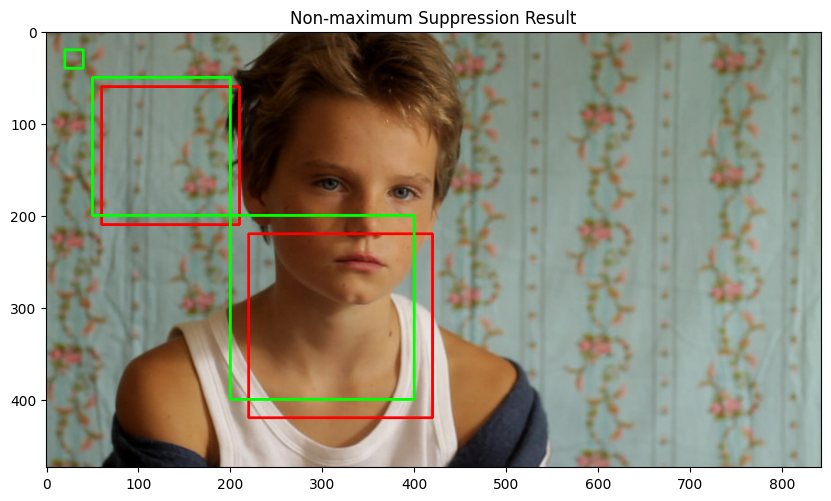

In [51]:
# 결과 시각화
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('Non-maximum Suppression Result')
plt.show()


### SSD example

In [8]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision.models.detection import ssd300_vgg16

In [ ]:
def load_pretrained_ssd_model():
    # 사전 학습된 SSD300 모델 호출.
    model = ssd300_vgg16(pretrained=True) # 사전에 학습된 가중치를 사용
    model.eval()  # 평가 모드로 설정
    return model


In [ ]:
# 모델 로드
model = load_pretrained_ssd_model()


/home/tommy/miniconda3/envs/py311/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tommy/miniconda3/envs/py311/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# 이미지 경로
img_path = '/content/cup.jpg'
img_path = '/content/teddy_bear.jpg'
img_path = '/content/bench.jpg'
img_path = '/content/cat1.png'
img_path = 'data/_test_14.png'
img_path = 'data/_test_9.png'
img_path = 'data/_test_10.png'
img_path = 'data/_test_16.png'


In [ ]:
import os

In [ ]:
# 이미지 로드, 전처리
img = Image.open(img_path).convert("RGB")

# 이미지 크기 얻기
orig_width, orig_height = img.size

transform = transforms.Compose([
    transforms.Resize((300, 300)),  # 모델 입력 크기에 맞춰 조정
    transforms.ToTensor(),  # 텐서로 변환
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # 이미지 정규화
])

img = transform(img).unsqueeze(0)  # 배치 차원 추가



In [ ]:
# 이미지에서 객체를 탐지
with torch.no_grad():  # 그라디언트 계산 비활성화
    predictions = model(img)

In [ ]:
# 예측 결과 출력
print('Predicted:', predictions)

Predicted: [{'boxes': tensor([[189.5846, 179.0605, 204.8389, 206.0919],
        [156.2277, 184.2004, 170.8079, 209.3278],
        [183.4481,  62.5395, 213.9913, 109.9713],
        [100.7447, 190.6003, 113.6938, 216.8745],
        [188.5493, 126.6492, 204.4940, 152.8687],
        [228.3706, 224.5695, 245.1518, 253.6467],
        [124.3249,   9.7945, 157.9850,  59.8004],
        [228.7269, 171.6435, 244.0968, 198.7975],
        [106.0703,  35.7536, 137.1561,  68.5221],
        [102.3743,  47.0021, 128.8788,  74.1262],
        [125.5646, 142.3196, 143.2180, 174.2126],
        [154.8410,  93.1679, 170.4201, 121.0589],
        [125.2164, 187.1915, 143.6665, 213.8138],
        [125.1893, 108.1733, 140.9920, 136.2133],
        [197.7117,  73.2132, 209.0200,  99.2993],
        [128.8888, 262.3051, 142.6021, 288.0625],
        [188.5853,  75.0095, 204.5224, 101.9004],
        [230.4742,  58.1499, 246.4985,  83.5745],
        [182.7130,  90.0740, 213.9753, 130.8871],
        [118.7296,  30.5775,

[결과해석] <br><br>
boxes(경계 상자): 탐지된 객체의 경계 상자의 좌표를 포함하는 텐서<br>
각 상자의 좌표 정보[x_min, y_min, x_max, y_max] 형태 => 이미지 내에서 객체의 위치<br><br>
labels: 탐지된 각 객체의 클래스 ID를 나타내는 텐서 = 데이터셋의 특정 클래스<br>
scores: 각 탐지에 대한 신뢰도 점수(텐서)=모델의 해당 객체에 대한 신뢰도<br>
높은 점수는 더 높은 신뢰도를 의미

경계 상자(boxes):첫 번째 경계 상자 [62.6710, 11.4240, 161.0400, 280.8900]<br> 이미지의 좌측 상단 모서리에서 오른쪽 하단 모서리까지의 직사각형 영역을 나타냄<br>이곳에 객체가 존재함을 의미<br><br>
클래스 레이블(labels):88(labels의 첫 번째 값)은 COCO 데이터셋의 클래스 인덱스 중 하나<br> COCO 데이터셋의 클래스 목록을 통해 각 숫자가 실제 어떤 객체를 나타내는지는 확인 <br>
COCO 데이터셋의 88번 클래스는 2017 버전에서 "teddy bear"
<br><br>
신뢰도 점수(scores):0.9108(첫 번째 객체의 신뢰도 점수)<br>
모델이 해당 객체 탐지 결과를 약 91.08%의 확신을 가지고 있다는 의미<br> 신뢰도 점수가 높을수록 탐지 결과의 정확도가 높다고 해석

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# COCO 2017 클래스 이름 목록
COCO_INSTANCE_CATEGORY_NAMES = [
    'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus','train', 'truck', 'boat', 'traffic light',
    'fire hydrant', '???', 'stop sign','parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep',
    'cow', 'elephant', 'bear', 'zebra', 'giraffe', '????', 'backpack', 'umbrella', '?_?', '?????',
    'handbag', 'tie','suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', '?', 'wine glass','cup','fork','knife','spoon',
    'bowl','banana','apple','sandwich','orange','broccoli','carrot','hot dog','pizza','donut',
    'cake','chair','couch','potted plant','bed','???','dining table','???','???','toilet',
    '???', 'tv','laptop','mouse','remote','keyboard','cell phone','microwave','oven','toaster',
    'sink','refrigerator','book','clock','???','vase','scissors','teddy bear','hair drier','toothbrush']


In [ ]:
COCO_INSTANCE_CATEGORY_NAMES[1]

'person'

In [ ]:
# 예측 결과 가져오기
pred_scores = predictions[0]['scores'].numpy()
pred_boxes = predictions[0]['boxes'].numpy()
pred_labels = predictions[0]['labels'].numpy()

In [ ]:
print(pred_scores)
print(pred_boxes)
print(pred_labels)

[0.13066274 0.11703838 0.09628583 0.09204592 0.08853541 0.07569435
 0.06955413 0.06805811 0.0671697  0.06354057 0.06264363 0.06189935
 0.06082046 0.06004046 0.05944689 0.05797529 0.0574424  0.05723339
 0.05699493 0.0553552  0.05317174 0.05292832 0.05219458 0.05184391
 0.04959765 0.04911025 0.04871806 0.04784738 0.04639068 0.04631737
 0.04596335 0.04529532 0.0449027  0.04436658 0.04417622 0.04324562
 0.04286417 0.04198123 0.04194276 0.04158284 0.04129074 0.04076448
 0.04073856 0.04063667 0.04038247 0.04025813 0.04022752 0.03950351
 0.03946446 0.03942854 0.03935775 0.03907564 0.03894142 0.0388637
 0.03869566 0.03868433 0.03865275 0.03836279 0.0378793  0.03761216
 0.03754792 0.03740126 0.03731526 0.03712337 0.03711504 0.03656214
 0.03563043 0.03525038 0.03521122 0.03468902 0.03455999 0.03414669
 0.03412072 0.0338924  0.03335945 0.03278249 0.03261878 0.03255549
 0.03249042 0.03238511 0.03228013 0.03216837 0.03210673 0.03207235
 0.03194482 0.03183606 0.0316099  0.03141817 0.03137541 0.03131

In [ ]:
# 신뢰도가 가장 높은 결과 가져오기
max_score_idx = pred_scores.argmax()
score = pred_scores[max_score_idx]

In [ ]:
print(pred_boxes[max_score_idx])

[189.58464 179.06052 204.83888 206.09189]


In [ ]:
score

0.13066274

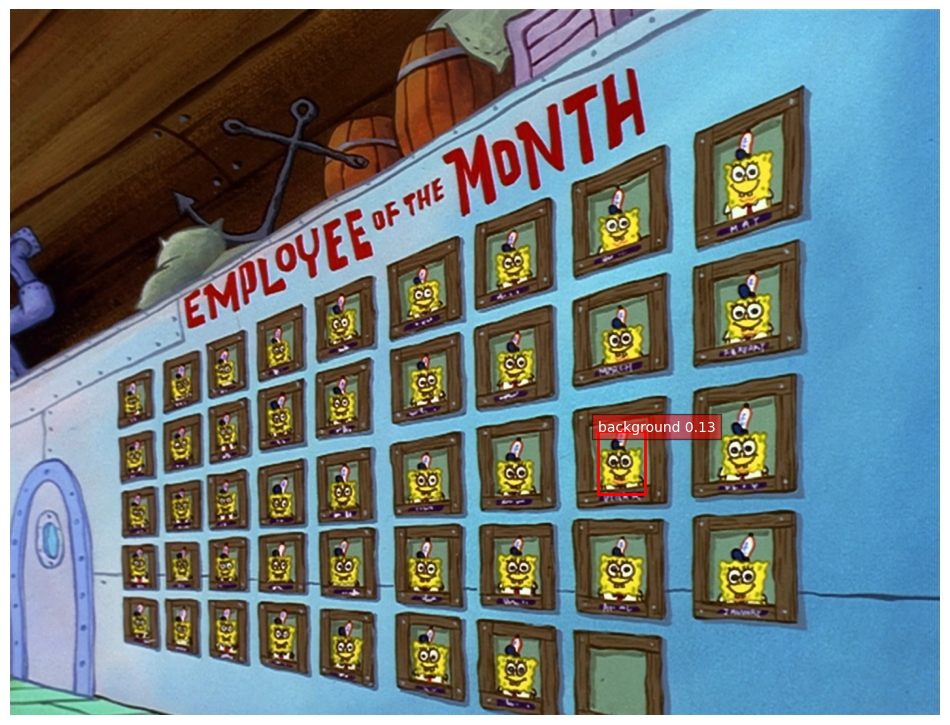

In [ ]:
# 결과 시각화
img = Image.open(img_path).convert("RGB")
plt.figure(figsize=(12, 12))
plt.imshow(img)
ax = plt.gca()

for idxeee in range(1,2):
    if score > 0.1:
        box = pred_boxes[max_score_idx]
        # 경계 상자 좌표를 원본 이미지 크기에 맞게 조정
        box = [
            (box[0] / 300) * orig_width,
            (box[1] / 300) * orig_height,
            (box[2] / 300) * orig_width,
            (box[3] / 300) * orig_height
        ]

        # print(box)
        label = pred_labels[max_score_idx]
        # print(label) # 88
        x_min, y_min, x_max, y_max = box
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
            linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        label_name = COCO_INSTANCE_CATEGORY_NAMES[max_score_idx]
        # label_name = COCO_INSTANCE_CATEGORY_NAMES[pred_labels[max_score_idx]]
        # print(label_name)
        ax.text(x_min, y_min, f'{label_name} {score:.2f}', color='white',
                bbox=dict(facecolor='red', alpha=0.5))


plt.axis('off')
plt.show()
